In [1]:
import datajoint as dj
import numpy as np
import time

from meshparty import trimesh_io

In [23]:
#setting the address and the username
dj.config['database.host'] = '10.28.0.34'
dj.config['database.user'] = 'celiib'
dj.config['database.password'] = 'newceliipass'
dj.config['safemode']=True
dj.config["display.limit"] = 30

schema = dj.schema('microns_ta3p100')
ta3p100 = dj.create_virtual_module('ta3p100', 'microns_ta3p100')


In [17]:
cmpnt_number_table = dj.U("segment_id").aggr(ta3p100.CompartmentOrphan.ComponentOrphan,cmpnt_number="count(*)")
cmpnt_number_table

segment_id segment id unique within each Segmentation,cmpnt_number calculated attribute
648518346341352006,2
648518346341352223,1
648518346341353019,1
648518346341353186,2
648518346341353574,4
648518346341353607,1
648518346341353788,1
648518346341353883,3
648518346341354048,1
648518346341354962,1


segment_id segment id unique within each Segmentation,cmpnt_number calculated attribute
648518346341352223,1
648518346341353019,1
648518346341353607,1
648518346341353788,1
648518346341354048,1
648518346341354962,1
648518346341355539,1
648518346341356260,1
648518346341356825,1
648518346341357549,1


In [25]:
ta3p100.Contact.describe()

-> ta3p100.Segmentation
contact_id           : int unsigned                 
---
-> ta3p100.FullContact
presyn_length        : float                        
postsyn_length       : float                        
n_synapses           : smallint unsigned            
synapse_sizes_mean   : float                        
majority_label       : tinyint unsigned             
majority_label_ratio : float                        



'-> ta3p100.Segmentation\ncontact_id           : int unsigned                 \n---\n-> ta3p100.FullContact\npresyn_length        : float                        \npostsyn_length       : float                        \nn_synapses           : smallint unsigned            \nsynapse_sizes_mean   : float                        \nmajority_label       : tinyint unsigned             \nmajority_label_ratio : float                        \n'

In [24]:
cmpnt_number_table = dj.U("segment_id").aggr(ta3p100.CompartmentOrphan.ComponentOrphan,cmpnt_number="count(*)")
cmpnt_number_table
(ta3p100.CompartmentOrphan.ComponentOrphan() & "compartment_type='Dendrite'" & "n_vertex_indices>50000" 
        & (cmpnt_number_table & "cmpnt_number=1").proj() )





segmentation segmentation id,segment_id segment id unique within each Segmentation,decimation_ratio,"compartment_type Basal, Apical, spine head, etc.",component_index Which sub-compartment of a certain label this is.,n_vertex_indices,n_triangle_indices,vertex_indices preserved indices of each vertex of this sub-compartment,triangle_indices preserved indices of each triangle of this sub-compartment
2,648518346341353607,0.35,Dendrite,0,68234,136186,=BLOB=,=BLOB=
2,648518346341355539,0.35,Dendrite,0,71989,143751,=BLOB=,=BLOB=
2,648518346341361981,0.35,Dendrite,0,254876,509054,=BLOB=,=BLOB=
2,648518346341362995,0.35,Dendrite,0,176993,353183,=BLOB=,=BLOB=
2,648518346341363175,0.35,Dendrite,0,135685,270903,=BLOB=,=BLOB=
2,648518346341364698,0.35,Dendrite,0,60203,120101,=BLOB=,=BLOB=
2,648518346341366757,0.35,Dendrite,0,75857,151289,=BLOB=,=BLOB=
2,648518346341367473,0.35,Dendrite,0,71386,142495,=BLOB=,=BLOB=
2,648518346341367927,0.35,Dendrite,0,75340,150313,=BLOB=,=BLOB=
2,648518346341368864,0.35,Dendrite,0,51749,103286,=BLOB=,=BLOB=


In [12]:
0.777778/(1-0.111111) + 0.111111/(1-0.111111)

0.9999999999999999

In [8]:
ta3p100.NeuriteTargetsRevised() & "spine_num > 0"

segmentation segmentation id,segment_id segment id unique within each Segmentation,apical_num total number of apicals synapsis for neurite,apical_prop perc of total number of apicals synapsis for neurite,apical_spine_prop perc of apical synapses that are apical spine synapses,apical_spine_head_prop perc of apical synapses that are apical spine head synapses,apical_spine_neck_prop perc of apical synapses that are apical spine neck synapses,apical_shaft_prop perc of apical synapses that are apical shaft synapses,basal_num total number of basal synapsis for neurite,basal_prop perc of total number of basal synapsis for neurite,basal_spine_prop perc of basal synapses that are basal spine synapses,basal_spine_head_prop perc of basal synapses that are basal spine head synapses,basal_spine_neck_prop perc of basal synapses that are basal spine neck synapses,basal_shaft_prop perc of basal synapses that are basal shaft synapses,oblique_num total number of oblique synapsis for neurite,oblique_prop perc of total number of oblique synapsis for neurite,oblique_spine_prop perc of oblique synapses that are oblique spine synapses,oblique_spine_head_prop perc of oblique synapses that are oblique spine head synapses,oblique_spine_neck_prop perc of oblique synapses that are oblique spine neck synapses,oblique_shaft_prop perc of oblique synapses that are oblique shaft synapses,dendrite_num total number of dendrite synapsis for neurite,dendrite_prop perc of total number of dendrite synapsis for neurite,dendrite_spine_prop perc of dendrite synapses that are dendrite spine synapses,dendrite_spine_head_prop perc of dendrite synapses that are dendrite spine head synapses,dendrite_spine_neck_prop perc of dendrite synapses that are dendrite spine neck synapses,dendrite_shaft_prop perc of dendrite synapses that are dendrite shaft synapse,soma_num total number of soma synapsis for neurite,soma_prop perc of total number of soma synapsis for neurite,soma_non_spine_prop perc of total number of soma non_spine synapse,axon_num total number of axon synapsis for neurite,axon_prop perc of total number of axon synapsis for neurite,axon_non_spine_prop perc of total number of axon non_spine synapse,distal_num total number of distal synapsis for neurite,distal_prop perc of total number of distal synapsis for neurite,distal_non_spine_prop perc of total number of distal non_spine synapse,cilia_num total number of cilia synapsis for neurite,cilia_prop perc of total number of cilia synapsis for neurite,cilia_non_spine_prop perc of total number of cilia non_spine synapse,spine_num total number of spine synapsis for neurite,spine_prop perc of total number of spine synapsis for neurite,spine_head_num total number of spine head synapsis for neurite,spine_head_prop perc of total number of spine head synapsis for neurite,spine_neck_num total number of spine neck synapsis for neurite,spine_neck_prop perc of total number of spine neck synapsis for neurite,shaft_num total number of shaft synapsis for neurite,shaft_prop perc of total number of shaft synapsis for neurite,non_spine_num total number of non-spinable synapsis (aka not on apic/dendr/basal/oblique),non_spine_prop perc of total number of non-spinable synapsis (aka not on apic/dendr/basal/oblique),total total number of synapsis for neurite
2,648518346341351509,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.428571,0.142857,0.285714,0.0,0.0,3.0,0.428571,0.0,0.428571,0.0,0.0,1.0,0.142857,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.142857,6.0,0.857143,0.0,0.0,0.0,0.0,0.0,0.0,7.0
2,648518346341351512,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.666667,0.111111,0.444444,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.333333,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.111111,7.0,0.777778,0.0,0.0,1.0,0.111111,0.0,0.0,9.0
2,648518346341351525,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.8,0.1,0.6,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.2,0.0,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.1,7.0,0.7,1.0,0.1,1

In [16]:
#test to make sure there are dendrite spine neck and head
ta3p100.NeuriteTargetsRevised & 'dendrite_spine_neck_prop > 0' #there are 3337 tuples so checks out

segmentation segmentation id,segment_id segment id unique within each Segmentation,apical_num total number of apicals synapsis for neurite,apical_prop perc of total number of apicals synapsis for neurite,apical_spine_prop perc of apical synapses that are apical spine synapses,apical_spine_head_prop perc of apical synapses that are apical spine head synapses,apical_spine_neck_prop perc of apical synapses that are apical spine neck synapses,apical_shaft_prop perc of apical synapses that are apical shaft synapses,basal_num total number of basal synapsis for neurite,basal_prop perc of total number of basal synapsis for neurite,basal_spine_prop perc of basal synapses that are basal spine synapses,basal_spine_head_prop perc of basal synapses that are basal spine head synapses,basal_spine_neck_prop perc of basal synapses that are basal spine neck synapses,basal_shaft_prop perc of basal synapses that are basal shaft synapses,oblique_num total number of oblique synapsis for neurite,oblique_prop perc of total number of oblique synapsis for neurite,oblique_spine_prop perc of oblique synapses that are oblique spine synapses,oblique_spine_head_prop perc of oblique synapses that are oblique spine head synapses,oblique_spine_neck_prop perc of oblique synapses that are oblique spine neck synapses,oblique_shaft_prop perc of oblique synapses that are oblique shaft synapses,dendrite_num total number of dendrite synapsis for neurite,dendrite_prop perc of total number of dendrite synapsis for neurite,dendrite_spine_prop perc of dendrite synapses that are dendrite spine synapses,dendrite_spine_head_prop perc of dendrite synapses that are dendrite spine head synapses,dendrite_spine_neck_prop perc of dendrite synapses that are dendrite spine neck synapses,dendrite_shaft_prop perc of dendrite synapses that are dendrite shaft synapse,soma_num total number of soma synapsis for neurite,soma_prop perc of total number of soma synapsis for neurite,soma_non_spine_prop perc of total number of soma non_spine synapse,axon_num total number of axon synapsis for neurite,axon_prop perc of total number of axon synapsis for neurite,axon_non_spine_prop perc of total number of axon non_spine synapse,distal_num total number of distal synapsis for neurite,distal_prop perc of total number of distal synapsis for neurite,distal_non_spine_prop perc of total number of distal non_spine synapse,cilia_num total number of cilia synapsis for neurite,cilia_prop perc of total number of cilia synapsis for neurite,cilia_non_spine_prop perc of total number of cilia non_spine synapse,spine_num total number of spine synapsis for neurite,spine_prop perc of total number of spine synapsis for neurite,spine_head_num total number of spine head synapsis for neurite,spine_head_prop perc of total number of spine head synapsis for neurite,spine_neck_num total number of spine neck synapsis for neurite,spine_neck_prop perc of total number of spine neck synapsis for neurite,shaft_num total number of shaft synapsis for neurite,shaft_prop perc of total number of shaft synapsis for neurite,non_spine_num total number of non-spinable synapsis (aka not on apic/dendr/basal/oblique),non_spine_prop perc of total number of non-spinable synapsis (aka not on apic/dendr/basal/oblique),total total number of synapsis for neurite
2,648518346341351695,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.6,0.0,0.4,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.4,0.0,0.2,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.6,2.0,0.4,0.0,0.0,0.0,0.0,5.0
2,648518346341352081,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.2,0.0,0.1,0.0,0.1,1.0,0.1,0.0,0.1,0.0,0.0,7.0,0.7,0.0,0.3,0.1,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.5,1.0,0.1,4.0,0.4,0.0,0.0,10.0
2,648518346341352126,1.0,0.111111,0.0,0.111111,0.0,0.0,5.0,0.555556,0.0,0.444444,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.333333,0.0,0.222222,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.777778,2.0,0.222222,0.0,0.0,0.0,0.0,9.0
2,648518346341352411

In [22]:
#how to filter out the spine proportion
neurite_targets_no_spine = (ta3p100.NeuriteTargetsRevised()).proj(spine_head_prop="spine_head_prop/(1-spine_prop)",
                                                         spine_neck_prop="spine_neck_prop/(1-spine_neck_prop)",
                                                         shaft_prop="shaft_prop/(1-spine_neck_prop)",
                                                         non_spine_prop="non_spine_prop/(1-spine_neck_prop)",
                                                         total="total-spine_num")

print(len(neurite_targets_no_spine))
print(len(neurite_targets_no_spine & "total>12"))
print(len(neurite_targets_no_spine & "total>10")) 
print(len(neurite_targets_no_spine & "total>8")) 
print(len(neurite_targets_no_spine & "total>6")) 

32124
1169
2068
3875
7473


In [24]:
nt_no_spine_10 = (neurite_targets_no_spine & "total>10")
nt_no_spine_10

segmentation segmentation id,segment_id segment id unique within each Segmentation,spine_head_prop calculated attribute,spine_neck_prop calculated attribute,shaft_prop calculated attribute,non_spine_prop calculated attribute,total calculated attribute
2,648518346341351631,0.909090931504226,0.0,0.07692307233810425,0.0,11.0
2,648518346341351764,0.7272727489471436,0.37500001536682265,0.0,0.0,11.0
2,648518346341351904,0.0,0.09090909386469313,0.4545454449397473,0.4545454449397473,11.0
2,648518346341352368,0.8181818127632141,0.0,0.1818181872367859,0.0,11.0
2,648518346341352417,0.2857142984867096,0.2727272761754753,0.6363636380877377,0.0,14.0
2,648518346341352822,0.9090908898794946,0.0,0.0833333358168602,0.0,11.0
2,648518346341353060,0.9090909361839294,0.0,0.09090909361839294,0.0,11.0
2,648518346341353189,0.9166666536281505,0.0769230806263241,0.0,0.0,12.0
2,648518346341353198,0.8333333134651184,0.09090909386469313,0.09090909386469313,0.0,12.0
2,648518346341353247,0.1785714328289032,0.12000000133514405,0.4800000053405762,0.3200000146865845,28.0


In [35]:
#find the proportions
nt_no_spine_10_spine_head = nt_no_spine_10 & "spine_head_prop>0.80"
print("nt_no_spine_10_spine_head = " + str(len(nt_no_spine_10_spine_head)))
nt_no_spine_10_spine_head_len = len(nt_no_spine_10_spine_head)

nt_no_spine_10_spine_neck = nt_no_spine_10 & "spine_neck_prop>0.80"
print("nt_no_spine_10_spine_neck = " + str(len(nt_no_spine_10_spine_neck)))
nt_no_spine_10_spine_neck_len = len(nt_no_spine_10_spine_neck)

nt_no_spine_10_shaft = nt_no_spine_10 & "shaft_prop>0.80"
print("nt_no_spine_10_shaft = " + str(len(nt_no_spine_10_shaft)))
nt_no_spine_10_shaft_len = len(nt_no_spine_10_shaft)

nt_no_spine_10_non_spine = nt_no_spine_10 & "non_spine_prop>0.80"
print("nt_no_spine_10_non_spine = " + str(len(nt_no_spine_10_non_spine)))
nt_no_spine_10_non_spine_len = len(nt_no_spine_10_non_spine)

total_classified = (nt_no_spine_10_spine_head_len + nt_no_spine_10_spine_neck_len + nt_no_spine_10_shaft_len + nt_no_spine_10_non_spine_len)
left_over = len(nt_no_spine_10) - (nt_no_spine_10_spine_head_len + nt_no_spine_10_spine_neck_len + nt_no_spine_10_shaft_len + nt_no_spine_10_non_spine_len)
print(f"total_classified = {total_classified}")
print(f"left_over = {left_over}")

"""
Conclusions: When ran at 80%, could only get about half into groups


"""

nt_no_spine_10_spine_head = 805
nt_no_spine_10_spine_neck = 1
nt_no_spine_10_shaft = 119
nt_no_spine_10_non_spine = 10
total_classified = 935
left_over = 1133


'\nConclusions: When ran at 80%, could only get about half into groups\n\n\n'

In [39]:
#function for finding groups based on the number threshold and then proportions restrictions
def get_neurite_spine_groupings(num_threshold=10,prop_threshold=0.8):
    
    print(f"--- Groupings for num > {num_threshold} and proportions > {prop_threshold}---")
    nt_no_spine_10 = (neurite_targets_no_spine & "total>" + str(num_threshold))
    #find the proportions
    nt_no_spine_10_spine_head = nt_no_spine_10 & "spine_head_prop>" + str(prop_threshold)
    print("nt_no_spine_10_spine_head = " + str(len(nt_no_spine_10_spine_head)))
    nt_no_spine_10_spine_head_len = len(nt_no_spine_10_spine_head)

    nt_no_spine_10_spine_neck = nt_no_spine_10 & "spine_neck_prop>"+ str(prop_threshold)
    print("nt_no_spine_10_spine_neck = " + str(len(nt_no_spine_10_spine_neck)))
    nt_no_spine_10_spine_neck_len = len(nt_no_spine_10_spine_neck)

    nt_no_spine_10_shaft = nt_no_spine_10 & "shaft_prop>"+ str(prop_threshold)
    print("nt_no_spine_10_shaft = " + str(len(nt_no_spine_10_shaft)))
    nt_no_spine_10_shaft_len = len(nt_no_spine_10_shaft)

    nt_no_spine_10_non_spine = nt_no_spine_10 & "non_spine_prop>"+ str(prop_threshold)
    print("nt_no_spine_10_non_spine = " + str(len(nt_no_spine_10_non_spine)))
    nt_no_spine_10_non_spine_len = len(nt_no_spine_10_non_spine)

    total_classified = (nt_no_spine_10_spine_head_len + nt_no_spine_10_spine_neck_len + nt_no_spine_10_shaft_len + nt_no_spine_10_non_spine_len)
    left_over = len(nt_no_spine_10) - (nt_no_spine_10_spine_head_len + nt_no_spine_10_spine_neck_len + nt_no_spine_10_shaft_len + nt_no_spine_10_non_spine_len)
    print(f"total_classified = {total_classified}")
    print(f"left_over = {left_over}")
    
    return 

In [40]:
get_neurite_spine_groupings(10,0.8)
get_neurite_spine_groupings(10,0.75)
get_neurite_spine_groupings(6,0.75)
get_neurite_spine_groupings(6,0.)

--- Groupings for num > 10 and proportions > 0.8---
nt_no_spine_10_spine_head = 805
nt_no_spine_10_spine_neck = 1
nt_no_spine_10_shaft = 119
nt_no_spine_10_non_spine = 10
total_classified = 935
left_over = 1133


In [46]:
#help(np.linspace)
proportions_to_test = np.linspace(0.7,1,num=12)

for p in proportions_to_test:
    get_neurite_spine_groupings(10,p)

--- Groupings for num > 10 and proportions > 0.7---
nt_no_spine_10_spine_head = 1080
nt_no_spine_10_spine_neck = 3
nt_no_spine_10_shaft = 212
nt_no_spine_10_non_spine = 16
total_classified = 1311
left_over = 757
--- Groupings for num > 10 and proportions > 0.7272727272727272---
nt_no_spine_10_spine_head = 1048
nt_no_spine_10_spine_neck = 2
nt_no_spine_10_shaft = 196
nt_no_spine_10_non_spine = 15
total_classified = 1261
left_over = 807
--- Groupings for num > 10 and proportions > 0.7545454545454545---
nt_no_spine_10_spine_head = 902
nt_no_spine_10_spine_neck = 1
nt_no_spine_10_shaft = 149
nt_no_spine_10_non_spine = 11
total_classified = 1063
left_over = 1005
--- Groupings for num > 10 and proportions > 0.7818181818181817---
nt_no_spine_10_spine_head = 849
nt_no_spine_10_spine_neck = 1
nt_no_spine_10_shaft = 129
nt_no_spine_10_non_spine = 10
total_classified = 989
left_over = 1079
--- Groupings for num > 10 and proportions > 0.8090909090909091---
nt_no_spine_10_spine_head = 793
nt_no_spi

In [52]:
#get a group and then do compartment analysis on them

#lets stay pick the exhitatory group from greater than 10 synapses
nt_no_spine_10 = (neurite_targets_no_spine & "total>" + str(10))
#find the proportions
nt_no_spine_10_spine_head = nt_no_spine_10 & "spine_head_prop>" + str(0.8)
print("nt_no_spine_10_spine_head = " + str(len(nt_no_spine_10_spine_head)))

nt_no_spine_10_spine_head = 805


In [53]:
nt_no_spine_10_spine_head.proj()

segmentation segmentation id,segment_id segment id unique within each Segmentation
2,648518346341351631
2,648518346341352368
2,648518346341352822
2,648518346341353060
2,648518346341353189
2,648518346341353198
2,648518346341353469
2,648518346341353720
2,648518346341354498
2,648518346341354594


In [56]:
#from the neurite targets table need to remove any dendreite semplance from the total and the compartments
exhitatory_grouping = ta3p100.NeuriteTargetsRevised & nt_no_spine_10_spine_head.proj()
exhitatory_grouping

segmentation segmentation id,segment_id segment id unique within each Segmentation,apical_num total number of apicals synapsis for neurite,apical_prop perc of total number of apicals synapsis for neurite,apical_spine_prop perc of apical synapses that are apical spine synapses,apical_spine_head_prop perc of apical synapses that are apical spine head synapses,apical_spine_neck_prop perc of apical synapses that are apical spine neck synapses,apical_shaft_prop perc of apical synapses that are apical shaft synapses,basal_num total number of basal synapsis for neurite,basal_prop perc of total number of basal synapsis for neurite,basal_spine_prop perc of basal synapses that are basal spine synapses,basal_spine_head_prop perc of basal synapses that are basal spine head synapses,basal_spine_neck_prop perc of basal synapses that are basal spine neck synapses,basal_shaft_prop perc of basal synapses that are basal shaft synapses,oblique_num total number of oblique synapsis for neurite,oblique_prop perc of total number of oblique synapsis for neurite,oblique_spine_prop perc of oblique synapses that are oblique spine synapses,oblique_spine_head_prop perc of oblique synapses that are oblique spine head synapses,oblique_spine_neck_prop perc of oblique synapses that are oblique spine neck synapses,oblique_shaft_prop perc of oblique synapses that are oblique shaft synapses,dendrite_num total number of dendrite synapsis for neurite,dendrite_prop perc of total number of dendrite synapsis for neurite,dendrite_spine_prop perc of dendrite synapses that are dendrite spine synapses,dendrite_spine_head_prop perc of dendrite synapses that are dendrite spine head synapses,dendrite_spine_neck_prop perc of dendrite synapses that are dendrite spine neck synapses,dendrite_shaft_prop perc of dendrite synapses that are dendrite shaft synapse,soma_num total number of soma synapsis for neurite,soma_prop perc of total number of soma synapsis for neurite,soma_non_spine_prop perc of total number of soma non_spine synapse,axon_num total number of axon synapsis for neurite,axon_prop perc of total number of axon synapsis for neurite,axon_non_spine_prop perc of total number of axon non_spine synapse,distal_num total number of distal synapsis for neurite,distal_prop perc of total number of distal synapsis for neurite,distal_non_spine_prop perc of total number of distal non_spine synapse,cilia_num total number of cilia synapsis for neurite,cilia_prop perc of total number of cilia synapsis for neurite,cilia_non_spine_prop perc of total number of cilia non_spine synapse,spine_num total number of spine synapsis for neurite,spine_prop perc of total number of spine synapsis for neurite,spine_head_num total number of spine head synapsis for neurite,spine_head_prop perc of total number of spine head synapsis for neurite,spine_neck_num total number of spine neck synapsis for neurite,spine_neck_prop perc of total number of spine neck synapsis for neurite,shaft_num total number of shaft synapsis for neurite,shaft_prop perc of total number of shaft synapsis for neurite,non_spine_num total number of non-spinable synapsis (aka not on apic/dendr/basal/oblique),non_spine_prop perc of total number of non-spinable synapsis (aka not on apic/dendr/basal/oblique),total total number of synapsis for neurite
2,648518346341351631,3.0,0.230769,0.0,0.153846,0.0,0.0769231,2.0,0.153846,0.0769231,0.0769231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.615385,0.0769231,0.538462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.153846,10.0,0.769231,0.0,0.0,1.0,0.0769231,0.0,0.0,13.0
2,648518346341352368,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.545455,0.0,0.454545,0.0,0.0909091,2.0,0.181818,0.0,0.181818,0.0,0.0,3.0,0.272727,0.0,0.181818,0.0,0.0909091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.818182,0.0,0.0,2.0,0.181818,0.0,0.0,11.0
2,648518346341352822,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.583333,0.0833333,0.416667,0.0,0.0833333,1.0,0.0833333,0.0,0.0833333,0.0,0.0,4.0,0.333333,0.0,0.333333,0.0,0.0

In [58]:
without_dendrite = exhitatory_grouping.proj(
                                            apical_prop="apical_prop/(1-dendrite_prop)",
                                            basal_prop="basal_prop/(1-dendrite_prop)",
                                            oblique_prop="oblique_prop/(1-dendrite_prop)",
                                            soma_prop="soma_prop/(1-dendrite_prop)",
                                            axon_prop="axon_prop/(1-dendrite_prop)",
                                            total="total-dendrite_num"
    
                                            )
without_dendrite

segmentation segmentation id,segment_id segment id unique within each Segmentation,apical_prop calculated attribute,basal_prop calculated attribute,oblique_prop calculated attribute,soma_prop calculated attribute,axon_prop calculated attribute,total calculated attribute
2,648518346341351631,0.6000000387430214,0.4000000387430214,0.0,0.0,0.0,5.0
2,648518346341352368,0.0,0.7500000307336453,0.25000001024454843,0.0,0.0,8.0
2,648518346341352822,0.0,0.8749999832361934,0.12500000558793553,0.0,0.0,8.0
2,648518346341353060,0.09090909361839294,0.5454545617103577,0.3636363744735718,0.0,0.0,11.0
2,648518346341353189,0.2222222350997691,0.4444444701995382,0.33333334105986145,0.0,0.0,9.0
2,648518346341353198,0.11111111442248027,0.555555542310079,0.3333333333333333,0.0,0.0,9.0
2,648518346341353469,0.0,0.7777777880798152,0.2222222350997691,0.0,0.0,9.0
2,648518346341353720,0.36363637545877253,0.4545454449397473,0.18181818772938627,0.0,0.0,11.0
2,648518346341354498,0.0,1.0000000447034842,0.0,0.0,0.0,8.0
2,648518346341354594,0.07692307890695936,0.6153846312556749,0.30769231562783744,0.0,0.0,13.0


In [61]:
without_dendrites_10 = without_dendrite & "total>10"
without_dendrites_10

segmentation segmentation id,segment_id segment id unique within each Segmentation,apical_prop calculated attribute,basal_prop calculated attribute,oblique_prop calculated attribute,soma_prop calculated attribute,axon_prop calculated attribute,total calculated attribute
2,648518346341353060,0.09090909361839294,0.5454545617103577,0.3636363744735718,0.0,0.0,11.0
2,648518346341353720,0.36363637545877253,0.4545454449397473,0.18181818772938627,0.0,0.0,11.0
2,648518346341354594,0.07692307890695936,0.6153846312556749,0.30769231562783744,0.0,0.0,13.0
2,648518346341354883,0.3571428744768612,0.5714285829845741,0.07142857287307176,0.0,0.0,14.0
2,648518346341355566,0.5384615384615384,0.3076923076923077,0.15384615384615385,0.0,0.0,13.0
2,648518346341356730,0.0833333358168602,0.8333333134651184,0.0833333358168602,0.0,0.0,12.0
2,648518346341357170,0.20000000715255742,0.6666667024294537,0.1333333351214727,0.0,0.0,15.0
2,648518346341357615,0.666666701436043,0.25000000434617203,0.08333333767950538,0.0,0.0,12.0
2,648518346341358209,0.0,1.0000000173846881,0.0,0.0,0.0,12.0
2,648518346341358363,0.0909090924792546,0.8181818726141598,0.0909090924792546,0.0,0.0,11.0


In [68]:
#find the percentages of each compartment, 
#always seem like are going to have some basals

without_dendrites_10_apical_03 = without_dendrites_10 & "apical_prop > 0.3" & "basal_prop < 0.5"
print("without_dendrites_10_apical_03 = " + str(len(without_dendrites_10_apical_03)))
#find the average distribution of this group
without_dendrites_10_apical_03





without_dendrites_10_apical_03 = 36


segmentation segmentation id,segment_id segment id unique within each Segmentation,apical_prop calculated attribute,basal_prop calculated attribute,oblique_prop calculated attribute,soma_prop calculated attribute,axon_prop calculated attribute,total calculated attribute
2,648518346341353720,0.36363637545877253,0.4545454449397473,0.18181818772938627,0.0,0.0,11.0
2,648518346341355566,0.5384615384615384,0.3076923076923077,0.15384615384615385,0.0,0.0,13.0
2,648518346341357615,0.666666701436043,0.25000000434617203,0.08333333767950538,0.0,0.0,12.0
2,648518346341366343,0.4545454666141636,0.4545454666141636,0.09090909521934416,0.0,0.0,11.0
2,648518346341371418,0.3846153913164984,0.4615384347340064,0.1538461521708754,0.0,0.0,13.0
2,648518346341386134,0.36363638087737665,0.4545454666141636,0.18181819043868833,0.0,0.0,11.0
2,648518346341394108,0.3846154011036518,0.46153847352992855,0.15384615459562054,0.0,0.0,13.0
2,648518346341403623,0.38461539916385573,0.4615384721191678,0.15384616310427182,0.0,0.0,13.0
2,648518346341405348,0.5454545469323465,0.4545454449397473,0.0,0.0,0.0,11.0
2,648518346341406591,0.5454545523509506,0.36363638087737665,0.09090909521934416,0.0,0.0,11.0


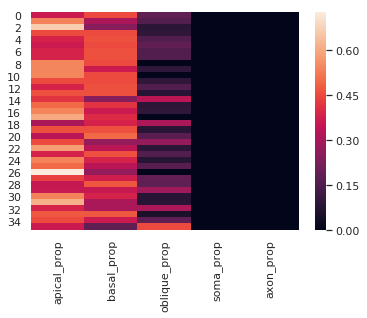

In [80]:
data = without_dendrites_10_apical_03.fetch(as_dict=True)
import pandas as pd
data_pandas = pd.DataFrame(data)
data_pandas_new = data_pandas.drop(columns=['segmentation', 'segment_id',"total"])
import seaborn as sns; sns.set()
ax = sns.heatmap(data_pandas_new)


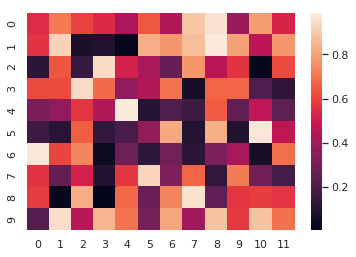

In [74]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
uniform_data = np.random.rand(10, 12)
uniform_data
ax = sns.heatmap(uniform_data)

In [ ]:
# add a column hours and days
df["hours"] = df.index.hour
df["days"] = df.index.map(lambda x: x.strftime('%b-%d'))     
# create pivot table, days will be columns, hours will be rows
piv = pd.pivot_table(df, values="freq",index=["hours"], columns=["days"], fill_value=0)
#plot pivot table as heatmap using seaborn
ax = sns.heatmap(piv, square=True)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
plt.tight_layout()
plt.show()